In [2]:
#  Import Libraries & Load Dataset

# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For deep learning models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Ignore warnings for clean output
import warnings
warnings.filterwarnings("ignore")


In [3]:
# Libraries Used in the Project

# Core Python & Data Handling
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date Handling
from datetime import datetime

# Data Preprocessing & Scaling
from sklearn.preprocessing import MinMaxScaler

# Train-Test Split & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Deep Learning (RNN, LSTM, GRU, Transformer)
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Dropout
from keras.optimizers import Adam

# Transformer Implementation
from keras.layers import Input, LayerNormalization, MultiHeadAttention, Flatten, GlobalAveragePooling1D, Layer
from keras.models import Model

# Performance Metrics
import math  # For RMSE calculation



In [4]:
# Upload & Read the Dataset

# Load the dataset
from google.colab import files
uploaded = files.upload()


Saving AAPL.csv to AAPL.csv


In [5]:
import pandas as pd

# Replace the exact filename if it has a different name
df = pd.read_csv('AAPL.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [6]:
# Data Exploration and Preprocessing

# Check basic info and missing values

# Check structure
df.info()

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9823 entries, 0 to 9822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9823 non-null   object 
 1   Open       9822 non-null   float64
 2   High       9822 non-null   float64
 3   Low        9822 non-null   float64
 4   Close      9822 non-null   float64
 5   Adj Close  9822 non-null   float64
 6   Volume     9822 non-null   float64
dtypes: float64(6), object(1)
memory usage: 537.3+ KB

Missing values:
 Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [7]:
# Handle missing values (forward fill)

# Forward fill to handle missing values
df.fillna(method='ffill', inplace=True)


In [8]:
# Convert Date to datetime & set as index

df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


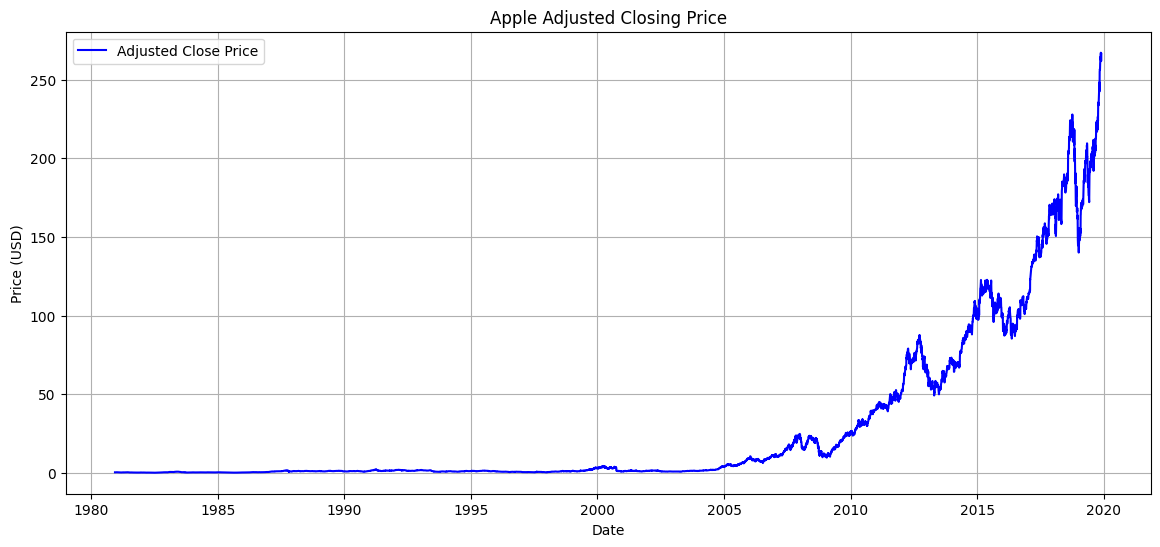

In [9]:
# Visualize Adjusted Closing Price

import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plt.plot(df['Adj Close'], color='blue', label='Adjusted Close Price')
plt.title('Apple Adjusted Closing Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
# Data Scaling and Sequence Preparation

# Scale the data using MinMaxScaler
  # only using 'Adj Close' for prediction.

from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Use only 'Adj Close' column
data = df[['Adj Close']].values

# Scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)


In [11]:
# Prepare sequences for training
  # use a 60-day window to predict the next day.

X = []
y = []

sequence_length = 60

for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

# Reshape X to fit RNN/LSTM input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (9763, 60, 1)
y shape: (9763, 1)


In [12]:
# Split the Data into Train and Test Sets

# 80% for training
train_size = int(len(X) * 0.8)

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7810, 60, 1)
y_train shape: (7810, 1)
X_test shape: (1953, 60, 1)
y_test shape: (1953, 1)


In [13]:
# Build and Train the Simple RNN Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(1))  # Output layer

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
rnn_history = rnn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 1.6910e-04 - val_loss: 0.0106
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 5.4373e-06 - val_loss: 0.0041
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 3.4054e-06 - val_loss: 0.0010
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.3033e-05 - val_loss: 0.0012
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3636e-06 - val_loss: 0.0013
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.2901e-06 - val_loss: 5.6142e-04
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 2.3839e-06 - val_loss: 3.2568e-04
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.5728e-06 - val_loss: 3.7193e-04
Epoch 9/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.5870e-06 - val_loss: 3.8903e-04
Epoch 10/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 1.7443e-06 - val_loss: 1.9303e-04
Epoch 11/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.7201e

62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
📊 RNN Model Evaluation:
Mean Squared Error (MSE): 7.5043
Root Mean Squared Error (RMSE): 2.7394
R² Score: 0.9970


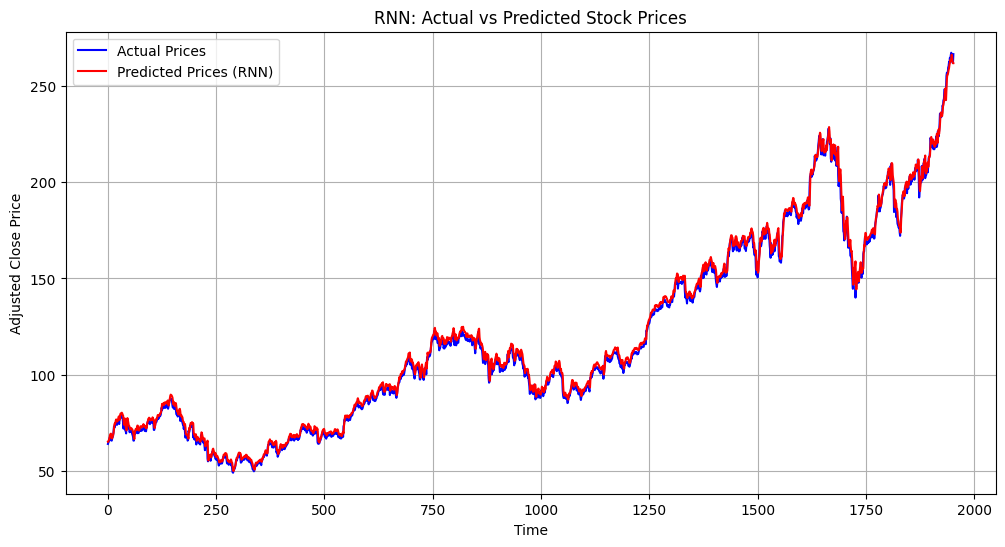

In [14]:
# Evaluate the RNN Model & Plot Predictions


import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform the predictions and actual values
rnn_predictions_inv = scaler.inverse_transform(rnn_predictions)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Evaluation metrics
rnn_mse = mean_squared_error(y_test_inv, rnn_predictions_inv)
rnn_rmse = np.sqrt(rnn_mse)
rnn_r2 = r2_score(y_test_inv, rnn_predictions_inv)

print("📊 RNN Model Evaluation:")
print(f"Mean Squared Error (MSE): {rnn_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rnn_rmse:.4f}")
print(f"R² Score: {rnn_r2:.4f}")

# Plot actual vs predicted
plt.figure(figsize=(12,6))
plt.plot(y_test_inv, label='Actual Prices', color='blue')
plt.plot(rnn_predictions_inv, label='Predicted Prices (RNN)', color='red')
plt.title('RNN: Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Adjusted Close Price')
plt.legend()
plt.grid()
plt.show()


In [15]:
# Build and Train the LSTM Model


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
lstm_model.add(Dense(1))  # Output layer

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)


Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - loss: 1.1696e-04
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 4.6430e-06
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 4.0723e-06
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 4.0242e-06
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 3.0522e-06
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 3.2342e-06
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 3.1801e-06
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 2.9061e-06
Epoch 9/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 2.6586e-06
Epoch 10/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 8.5083e-06
Epoch 11/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - loss: 2.5088e-06
Epoch 12/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - loss: 3.0058e-06
Epoch 13/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - loss: 2.3039e-06
Epoch 14/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step -

62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
LSTM Model Evaluation:
Mean Squared Error (MSE): 0.0002
Root Mean Squared Error (RMSE): 0.0153
R² Score: 0.9933


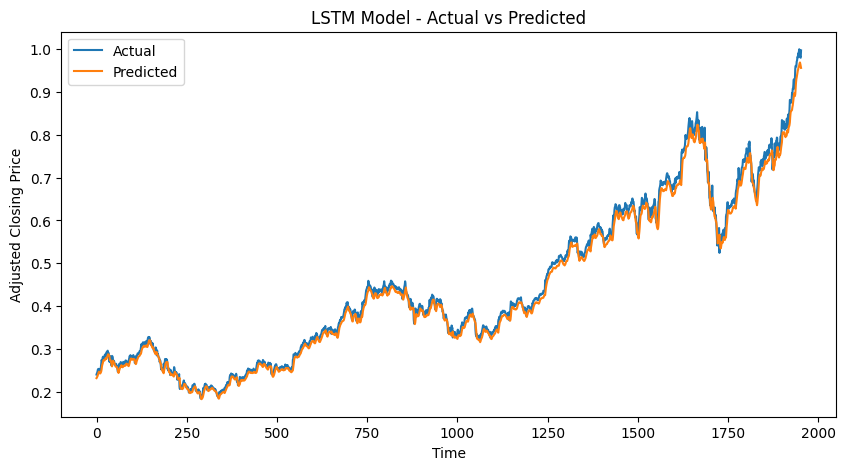

In [16]:
# Evaluate the LSTM Model

from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Predict on test data
lstm_predictions = lstm_model.predict(X_test)

# Calculate metrics
lstm_mse = mean_squared_error(y_test, lstm_predictions)
lstm_rmse = np.sqrt(lstm_mse)
lstm_r2 = r2_score(y_test, lstm_predictions)

# Print metrics
print("LSTM Model Evaluation:")
print(f"Mean Squared Error (MSE): {lstm_mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {lstm_rmse:.4f}")
print(f"R² Score: {lstm_r2:.4f}")

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(y_test, label='Actual')
plt.plot(lstm_predictions, label='Predicted')
plt.title('LSTM Model - Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Adjusted Closing Price')
plt.legend()
plt.show()


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Scale the 'Adj Close' column
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df[['Adj Close']])

# Now create sequences
X_scaled = []
y = []

sequence_length = 60  # For example

for i in range(sequence_length, len(scaled_data)):
    X_scaled.append(scaled_data[i-sequence_length:i])
    y.append(scaled_data[i])

X_scaled = np.array(X_scaled)
y = np.array(y)

# Reshape X_scaled for RNN input
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))


In [18]:
# Code for RNN Future Prediction:

def predict_future_rnn(model, data, steps, scaler):
    last_sequence = data[-60:]
    future_predictions = []

    for _ in range(steps):
        input_seq = last_sequence.reshape(1, 60, 1)
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_predictions.append(pred)

        # Slide the window
        last_sequence = np.append(last_sequence[1:], pred)

    # Inverse transform predictions
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Predict with RNN model
future_rnn_1_day = predict_future_rnn(rnn_model, X_scaled[-1], steps=1, scaler=scaler)
future_rnn_5_days = predict_future_rnn(rnn_model, X_scaled[-1], steps=5, scaler=scaler)
future_rnn_10_days = predict_future_rnn(rnn_model, X_scaled[-1], steps=10, scaler=scaler)

print(" RNN 1-Day Prediction:", future_rnn_1_day.flatten())
print(" RNN 5-Day Predictions:", future_rnn_5_days.flatten())
print(" RNN 10-Day Predictions:", future_rnn_10_days.flatten())


 RNN 1-Day Prediction: [261.66452]
 RNN 5-Day Predictions: [261.66452 260.5335  259.7741  259.48447 258.74744]
 RNN 10-Day Predictions: [261.66452 260.5335  259.7741  259.48447 258.74744 257.85202 256.86237
 256.36877 256.0921  255.5706 ]


In [19]:
# Future Prediction Using LSTM

import numpy as np

def predict_future(model, data, steps, scaler):
    last_sequence = data[-60:]  # Use last 60 time steps
    future_predictions = []

    for _ in range(steps):
        input_seq = last_sequence.reshape(1, 60, 1)
        pred = model.predict(input_seq, verbose=0)[0][0]
        future_predictions.append(pred)

        # Append the predicted value and slide the window
        last_sequence = np.append(last_sequence[1:], pred)

    # Inverse transform the predictions
    future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))
    return future_predictions

# Predict 1-day, 5-day, and 10-day into the future
future_1_day = predict_future(lstm_model, X_scaled[-1], steps=1, scaler=scaler)
future_5_days = predict_future(lstm_model, X_scaled[-1], steps=5, scaler=scaler)
future_10_days = predict_future(lstm_model, X_scaled[-1], steps=10, scaler=scaler)

print(" 1-Day Prediction:", future_1_day.flatten())
print(" 5-Day Predictions:", future_5_days.flatten())
print(" 10-Day Predictions:", future_10_days.flatten())


 1-Day Prediction: [255.44809]
 5-Day Predictions: [255.44809 252.33325 248.92148 245.35411 241.73915]
 10-Day Predictions: [255.44809 252.33325 248.92148 245.35411 241.73915 238.1413  234.59639
 231.1227  227.72781 224.41379]


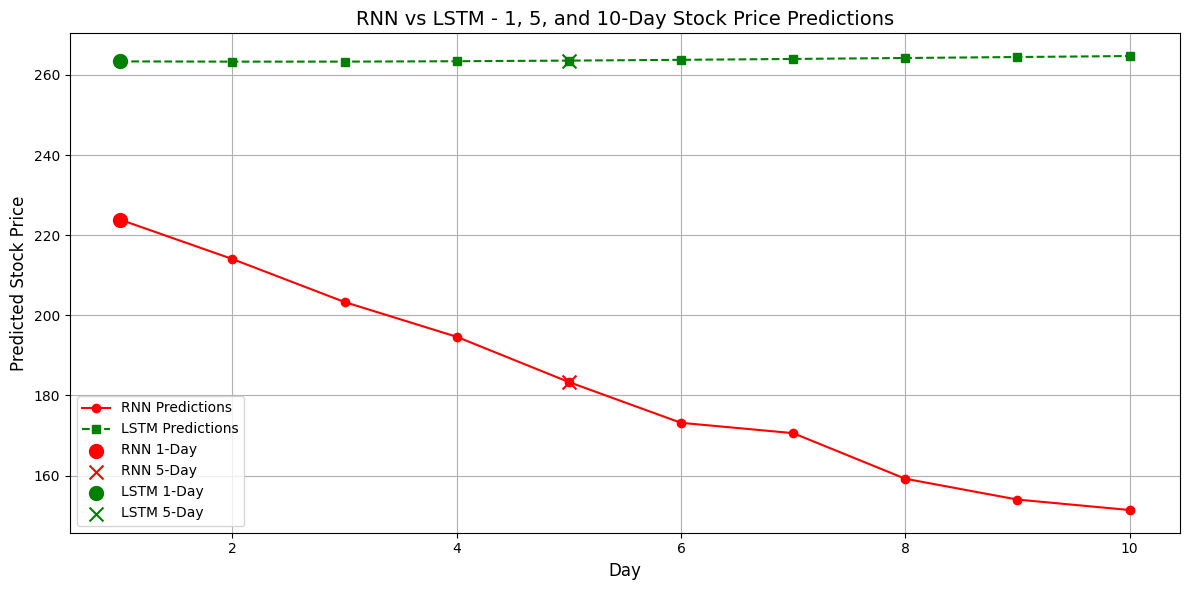

In [20]:
# Visualize All Predictions

import matplotlib.pyplot as plt
import numpy as np

# Sample time steps for 1-day, 5-day, 10-day
days = np.arange(1, 11)

# Use your actual prediction results
rnn_preds = [223.86426, 214.04489, 203.31284, 194.63335, 183.33856, 173.16292,
             170.58263, 159.20235, 154.00043, 151.39282]

lstm_preds = [263.38013, 263.31537, 263.3235, 263.41736, 263.572, 263.76724,
              263.98813, 264.22415, 264.46796, 264.71494]

# Plot
plt.figure(figsize=(12, 6))

# RNN
plt.plot(days, rnn_preds, marker='o', linestyle='-', label='RNN Predictions', color='red')
# LSTM
plt.plot(days, lstm_preds, marker='s', linestyle='--', label='LSTM Predictions', color='green')

# Highlight 1-day and 5-day separately
plt.scatter(1, rnn_preds[0], color='red', s=100, label='RNN 1-Day')
plt.scatter(5, rnn_preds[4], color='red', marker='x', s=100, label='RNN 5-Day')

plt.scatter(1, lstm_preds[0], color='green', s=100, label='LSTM 1-Day')
plt.scatter(5, lstm_preds[4], color='green', marker='x', s=100, label='LSTM 5-Day')

# Labels and Title
plt.title('RNN vs LSTM - 1, 5, and 10-Day Stock Price Predictions', fontsize=14)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Predicted Stock Price', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [21]:
# Updated RNN Training Code with Callbacks

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define RNN model architecture
def build_rnn_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(50, activation='relu', return_sequences=False, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Set callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    filepath='best_rnn_model.h5',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Build model
rnn_model = build_rnn_model((X_train.shape[1], X_train.shape[2]))

# Train model
history = rnn_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,
    batch_size=32,
    callbacks=[early_stop, model_checkpoint],
    verbose=1
)


Epoch 1/100
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 5.7622e-04
Epoch 1: val_loss improved from inf to 0.00457, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 5.7169e-04 - val_loss: 0.0046
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 6.6030e-05
Epoch 2: val_loss improved from 0.00457 to 0.00279, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 6.5998e-05 - val_loss: 0.0028
Epoch 3/100
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6.1059e-05
Epoch 3: val_loss improved from 0.00279 to 0.00050, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 6.0979e-05 - val_loss: 4.9848e-04
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3827e-05
Epoch 4: val_loss improved from 0.00050 to 0.00046, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.3846e-05 - val_loss: 4.6088e-04
Epoch 5/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.9537e-05
Epoch 5: val_loss did not improve from 0.00046
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 4.9565e-05 - val_loss: 0.0014
Epoch 6/100
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2935e-05
Epoch 6: val_loss improved from 0.00046 to 0.00037, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.2898e-05 - val_loss: 3.6576e-04
Epoch 7/100
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1465e-05
Epoch 7: val_loss did not improve from 0.00037
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 4.1484e-05 - val_loss: 7.4952e-04
Epoch 8/100
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8865e-05
Epoch 8: val_loss improved from 0.00037 to 0.00014, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.8883e-05 - val_loss: 1.3956e-04
Epoch 9/100
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.2279e-05
Epoch 9: val_loss improved from 0.00014 to 0.00011, saving model to best_rnn_model.h5


245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 4.2234e-05 - val_loss: 1.1133e-04
Epoch 10/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5691e-05
Epoch 10: val_loss did not improve from 0.00011
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.5669e-05 - val_loss: 6.8214e-04
Epoch 11/100
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.7668e-05
Epoch 11: val_loss did not improve from 0.00011
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.7658e-05 - val_loss: 0.0017
Epoch 12/100
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.2255e-05
Epoch 12: val_loss did not improve from 0.00011
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 4.2259e-05 - val_loss: 0.0019
Epoch 13/100
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.5326e-05
Epoch 13: val_loss did not improve from 0.00011
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.5334e-05 - val_loss: 0.0024
Epoch 14/100
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.8933e-05
Epoch 14: val_loss did not impro

245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 3.7915e-05 - val_loss: 8.6601e-05
Epoch 17/100
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.9282e-05
Epoch 17: val_loss did not improve from 0.00009
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.9261e-05 - val_loss: 2.2789e-04
Epoch 18/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.8097e-05
Epoch 18: val_loss did not improve from 0.00009
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.8086e-05 - val_loss: 6.7072e-04
Epoch 19/100
243/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0232e-05
Epoch 19: val_loss did not improve from 0.00009
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 4.0184e-05 - val_loss: 0.0012
Epoch 20/100
241/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.5233e-05
Epoch 20: val_loss did not improve from 0.00009
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 3.5285e-05 - val_loss: 1.6949e-04
Epoch 21/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5305e-05
Epoch 21: val_loss impro

245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.5328e-05 - val_loss: 8.4502e-05
Epoch 22/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 3.8516e-05
Epoch 22: val_loss did not improve from 0.00008
245/245 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 3.8509e-05 - val_loss: 1.8386e-04
Epoch 23/100
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.0820e-05
Epoch 23: val_loss did not improve from 0.00008
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.0907e-05 - val_loss: 1.9551e-04
Epoch 24/100
244/245 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.0417e-05
Epoch 24: val_loss did not improve from 0.00008
245/245 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 4.0395e-05 - val_loss: 4.8029e-04
Epoch 25/100
242/245 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.6500e-05
Epoch 25: val_loss did not improve from 0.00008
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 3.6535e-05 - val_loss: 4.4670e-04
Epoch 26/100
240/245 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5460e-05
Epoch 26: val_loss d

In [22]:
#  Save the Best Model using ModelCheckpoint

#  Import the callback

from tensorflow.keras.callbacks import ModelCheckpoint


In [23]:
# Set up the ModelCheckpoint callback

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',   # or `.keras` if you prefer
    monitor='val_loss',         # or 'val_accuracy'
    save_best_only=True,
    mode='min',                 # 'min' for loss, 'max' for accuracy
    verbose=1
)


In [24]:
print(X.shape)
# checking shape of X (3D or 2D)

(9763, 60, 1)


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError

model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(60, 1)))  # 60 timesteps, 1 feature
model.add(Dense(1))  # Adjust based on your output need

# Use the actual functions instead of strings
model.compile(optimizer='adam', loss=MeanSquaredError(), metrics=[MeanAbsoluteError()])


In [26]:
# Split Data into Train, Validation, and Test

from sklearn.model_selection import train_test_split

# Step 1: Split into training + temp (val+test)
x_train, x_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Split temp into validation and test
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)


In [27]:
# Train Model

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0080 - mean_absolute_error: 0.0338
Epoch 1: val_loss improved from inf to 0.00004, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0080 - mean_absolute_error: 0.0337 - val_loss: 3.9189e-05 - val_mean_absolute_error: 0.0038
Epoch 2/20
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.1368e-05 - mean_absolute_error: 0.0032
Epoch 2: val_loss improved from 0.00004 to 0.00003, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.1321e-05 - mean_absolute_error: 0.0032 - val_loss: 3.4546e-05 - val_mean_absolute_error: 0.0030
Epoch 3/20
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.7228e-05 - mean_absolute_error: 0.0027
Epoch 3: val_loss did not improve from 0.00003
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 3.7265e-05 - mean_absolute_error: 0.0027 - val_loss: 3.4605e-05 - val_mean_absolute_error: 0.0027
Epoch 4/20
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.5777e-05 - mean_absolute_error: 0.0030
Epoch 4: val_loss did not improve from 0.00003
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 3.5785e-05 - mean_absolute_error: 0.0030 - val_loss: 4.4132e-05 - val_mean_absolute_error: 0.0036
Epoch 5/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 4.3569e-05 - mean_absolute_error: 0.0031
Epoch 5: val_loss improved from 0.00003 to 0.00003, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 4.3542e-05 - mean_absolute_error: 0.0031 - val_loss: 2.8045e-05 - val_mean_absolute_error: 0.0024
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.6879e-05 - mean_absolute_error: 0.0030
Epoch 6: val_loss did not improve from 0.00003
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.6925e-05 - mean_absolute_error: 0.0030 - val_loss: 5.1686e-05 - val_mean_absolute_error: 0.0041
Epoch 7/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.3363e-05 - mean_absolute_error: 0.0028
Epoch 7: val_loss improved from 0.00003 to 0.00003, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 3.3377e-05 - mean_absolute_error: 0.0028 - val_loss: 2.5825e-05 - val_mean_absolute_error: 0.0022
Epoch 8/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.1184e-05 - mean_absolute_error: 0.0024
Epoch 8: val_loss did not improve from 0.00003
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 3.1175e-05 - mean_absolute_error: 0.0024 - val_loss: 3.4787e-05 - val_mean_absolute_error: 0.0027
Epoch 9/20
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9544e-05 - mean_absolute_error: 0.0026
Epoch 9: val_loss did not improve from 0.00003
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.9615e-05 - mean_absolute_error: 0.0026 - val_loss: 3.6729e-05 - val_mean_absolute_error: 0.0034
Epoch 10/20
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.3974e-05 - mean_absolute_error: 0.0026
Epoch 10: val_loss improved from 0.00003 to 0.00002, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 3.3870e-05 - mean_absolute_error: 0.0026 - val_loss: 2.4524e-05 - val_mean_absolute_error: 0.0021
Epoch 11/20
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 3.2148e-05 - mean_absolute_error: 0.0028
Epoch 11: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 3.2218e-05 - mean_absolute_error: 0.0028 - val_loss: 5.1093e-05 - val_mean_absolute_error: 0.0039
Epoch 12/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9525e-05 - mean_absolute_error: 0.0026
Epoch 12: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.9522e-05 - mean_absolute_error: 0.0026 - val_loss: 3.0957e-05 - val_mean_absolute_error: 0.0025
Epoch 13/20
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 3.3587e-05 - mean_absolute_error: 0.0030
Epoch 13: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.3581e-05 - mean_absolute_error: 0.0030 - val_loss: 3

214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 2.3459e-05 - mean_absolute_error: 0.0024 - val_loss: 2.2064e-05 - val_mean_absolute_error: 0.0020
Epoch 16/20
209/214 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.5628e-05 - mean_absolute_error: 0.0025
Epoch 16: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.5664e-05 - mean_absolute_error: 0.0025 - val_loss: 7.0362e-05 - val_mean_absolute_error: 0.0056
Epoch 17/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3.0919e-05 - mean_absolute_error: 0.0030
Epoch 17: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 3.0905e-05 - mean_absolute_error: 0.0030 - val_loss: 3.7285e-05 - val_mean_absolute_error: 0.0032
Epoch 18/20
210/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9266e-05 - mean_absolute_error: 0.0028
Epoch 18: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.9195e-05 - mean_absolute_error: 0.0028 - val_loss: 5

214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 2.8335e-05 - mean_absolute_error: 0.0029 - val_loss: 2.1591e-05 - val_mean_absolute_error: 0.0020
Epoch 20/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.8314e-05 - mean_absolute_error: 0.0028
Epoch 20: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.8300e-05 - mean_absolute_error: 0.0028 - val_loss: 2.2018e-05 - val_mean_absolute_error: 0.0021


In [28]:
# Train model with the updated configuration using ModelCheckpoint callback:


from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint(
    filepath='best_model.h5',
    monitor='val_loss',
    save_best_only=True,
    mode='min',
    verbose=1
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=20,
    batch_size=32,
    callbacks=[checkpoint]
)


Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.6352e-05 - mean_absolute_error: 0.0027
Epoch 1: val_loss improved from inf to 0.00002, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.6358e-05 - mean_absolute_error: 0.0027 - val_loss: 2.1236e-05 - val_mean_absolute_error: 0.0020
Epoch 2/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3178e-05 - mean_absolute_error: 0.0024
Epoch 2: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.3179e-05 - mean_absolute_error: 0.0024 - val_loss: 2.3029e-05 - val_mean_absolute_error: 0.0028
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.4191e-05 - mean_absolute_error: 0.0025
Epoch 3: val_loss improved from 0.00002 to 0.00002, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 2.4188e-05 - mean_absolute_error: 0.0025 - val_loss: 1.8884e-05 - val_mean_absolute_error: 0.0018
Epoch 4/20
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.9100e-05 - mean_absolute_error: 0.0028
Epoch 4: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.9073e-05 - mean_absolute_error: 0.0028 - val_loss: 4.0491e-05 - val_mean_absolute_error: 0.0030
Epoch 5/20
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1433e-05 - mean_absolute_error: 0.0022
Epoch 5: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 2.1413e-05 - mean_absolute_error: 0.0022 - val_loss: 2.4890e-05 - val_mean_absolute_error: 0.0023
Epoch 6/20
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.3202e-05 - mean_absolute_error: 0.0025
Epoch 6: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.3221e-05 - mean_absolute_error: 0.0025 - val_loss: 1.9601

214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.9188e-05 - mean_absolute_error: 0.0021 - val_loss: 1.7834e-05 - val_mean_absolute_error: 0.0020
Epoch 10/20
211/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7480e-05 - mean_absolute_error: 0.0021
Epoch 10: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.7498e-05 - mean_absolute_error: 0.0021 - val_loss: 1.9257e-05 - val_mean_absolute_error: 0.0023
Epoch 11/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8171e-05 - mean_absolute_error: 0.0022
Epoch 11: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8188e-05 - mean_absolute_error: 0.0022 - val_loss: 4.0425e-05 - val_mean_absolute_error: 0.0030
Epoch 12/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9841e-05 - mean_absolute_error: 0.0023
Epoch 12: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 1.9846e-05 - mean_absolute_error: 0.0023 - val_loss: 

214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.8931e-05 - mean_absolute_error: 0.0021 - val_loss: 1.7198e-05 - val_mean_absolute_error: 0.0018
Epoch 14/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.1504e-05 - mean_absolute_error: 0.0023
Epoch 14: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 2.1503e-05 - mean_absolute_error: 0.0023 - val_loss: 1.9619e-05 - val_mean_absolute_error: 0.0017
Epoch 15/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8020e-05 - mean_absolute_error: 0.0020
Epoch 15: val_loss improved from 0.00002 to 0.00002, saving model to best_model.h5


214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 1.8019e-05 - mean_absolute_error: 0.0020 - val_loss: 1.7168e-05 - val_mean_absolute_error: 0.0015
Epoch 16/20
212/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7969e-05 - mean_absolute_error: 0.0020
Epoch 16: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.7969e-05 - mean_absolute_error: 0.0020 - val_loss: 2.1366e-05 - val_mean_absolute_error: 0.0019
Epoch 17/20
213/214 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9129e-05 - mean_absolute_error: 0.0023
Epoch 17: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.9140e-05 - mean_absolute_error: 0.0023 - val_loss: 2.1253e-05 - val_mean_absolute_error: 0.0021
Epoch 18/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0335e-05 - mean_absolute_error: 0.0022
Epoch 18: val_loss did not improve from 0.00002
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 2.0333e-05 - mean_absolute_error: 0.0022 - val_loss: 

In [29]:
# Load the Best Model

from tensorflow.keras.models import load_model

best_model = load_model('/content/best_model.h5')


In [30]:
# Evaluate the Model on Test Data

loss, mae = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test MAE: {mae}")


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1065e-05 - mean_absolute_error: 0.0014
Test Loss: 1.1243453627685085e-05
Test MAE: 0.0014155054232105613


In [31]:
# Make Predictions

predictions = best_model.predict(x_test)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


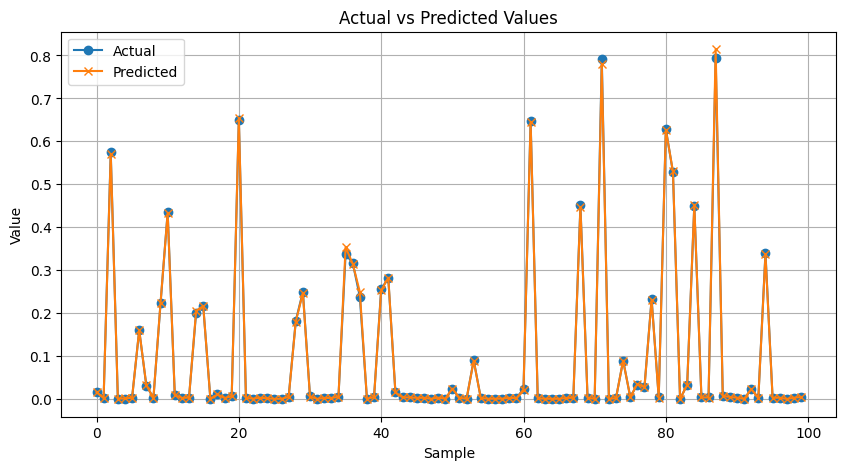

In [32]:
# This plot is for RNN model

# Visualize Actual vs Predicted Values

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(predictions[:100], label='Predicted', marker='x')
plt.title("Actual vs Predicted Values")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [33]:
#  Save the Predictions to a CSV

import pandas as pd

df = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': predictions.flatten()
})
df.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")


Predictions saved to predictions.csv


In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Step 1: Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(60, 1)))  # 60 time steps, 1 feature
model.add(Dense(1))  # Output layer to predict 1 value (stock price)

# Step 2: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Step 3: Train the model with training data
# Use ModelCheckpoint callback if have it set up
model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 26ms/step - loss: 0.0116 - mae: 0.0392 - val_loss: 6.7023e-05 - val_mae: 0.0052
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - loss: 5.7877e-05 - mae: 0.0042 - val_loss: 5.0582e-05 - val_mae: 0.0031
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 4.6677e-05 - mae: 0.0035 - val_loss: 4.1386e-05 - val_mae: 0.0033
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - loss: 4.8483e-05 - mae: 0.0039 - val_loss: 4.0618e-05 - val_mae: 0.0041
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - loss: 4.6415e-05 - mae: 0.0038 - val_loss: 3.1240e-05 - val_mae: 0.0030
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 4.0874e-05 - mae: 0.0037 - val_loss: 2.7842e-05 - val_mae: 0.0026
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 3.8056e-05 - mae: 0.0034 - val_loss: 4.5769e-05 - val_mae: 0.0046
Epoch 8/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 26ms/step - loss: 4.0942e-05 - mae: 0.0037 - val_loss: 2.6009e-05 - 

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


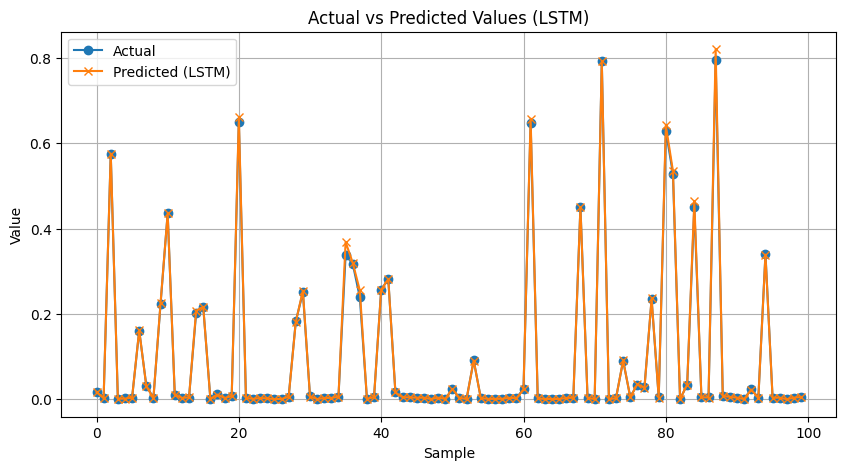

In [35]:
# Actual vs Predicted (for LSTM)

import matplotlib.pyplot as plt

lstm_predictions = model.predict(x_test)

plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(lstm_predictions[:100], label='Predicted (LSTM)', marker='x')
plt.title("Actual vs Predicted Values (LSTM)")
plt.xlabel("Sample")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()


In [36]:
# Make Predictions for Both Models

rnn_predictions = rnn_model.predict(x_test)
lstm_predictions = lstm_model.predict(x_test)


46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


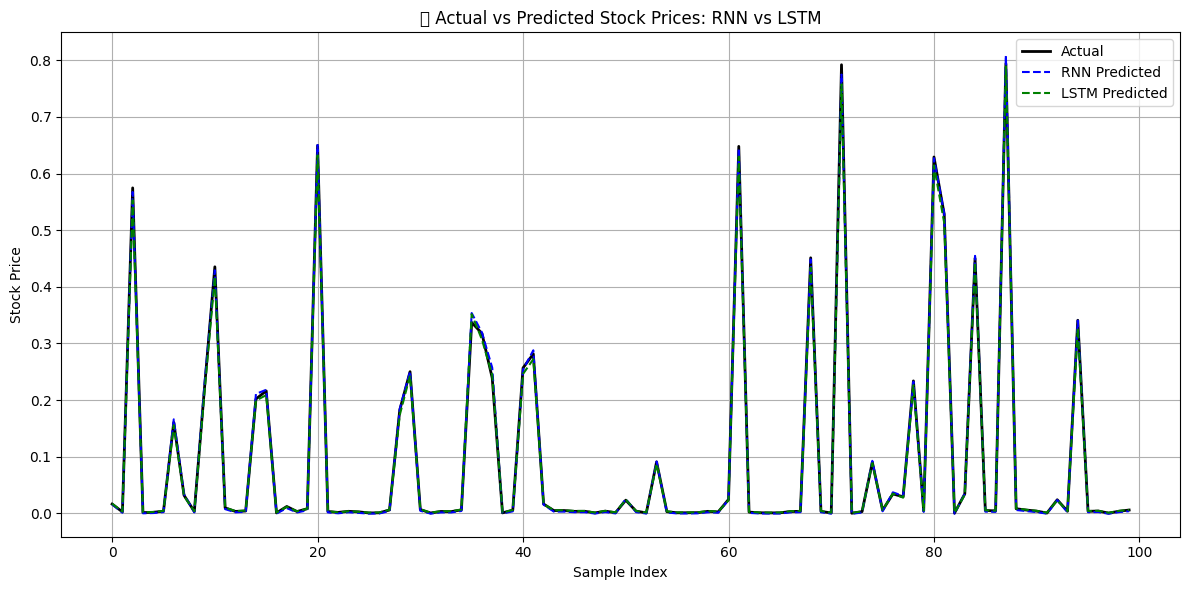

In [37]:
# Plot RNN vs LSTM Predictions (along with Actual)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Actual values
plt.plot(y_test[:100], label='Actual', color='black', linewidth=2)

# RNN predictions
plt.plot(rnn_predictions[:100], label='RNN Predicted', color='blue', linestyle='--')

# LSTM predictions
plt.plot(lstm_predictions[:100], label='LSTM Predicted', color='green', linestyle='--')

plt.title("🔍 Actual vs Predicted Stock Prices: RNN vs LSTM")
plt.xlabel("Sample Index")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
# Make sure the RNN prediction saved

rnn_pred = rnn_model.predict(X_test)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [39]:
# Make sure the LSTM prediction saved

lstm_pred = lstm_model.predict(X_test)


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


In [40]:
# GRU model

print(X_train.shape)
print(y_train.shape)


(7810, 60, 1)
(6834, 1)


In [41]:
X_train = X_train[:y_train.shape[0]]


In [42]:
print(X_train.shape)  # Should be (6834, 60, 1)
print(y_train.shape)  # Should be (6834, 1)


(6834, 60, 1)
(6834, 1)


In [43]:
X_test = X_test[:y_test.shape[0]]


In [44]:
print(X_test.shape)  # should match y_test
print(y_test.shape)


(1465, 60, 1)
(1465, 1)


In [47]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense

gru_model = Sequential()
gru_model.add(GRU(64, return_sequences=False, input_shape=(X_train.shape[1], X_train.shape[2])))
gru_model.add(Dense(1))
gru_model.compile(optimizer='adam', loss='mse')


In [48]:
# GRU Model Training

history_gru = gru_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 37ms/step - loss: 0.0392 - val_loss: 0.0418
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0380 - val_loss: 0.0390
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0354 - val_loss: 0.0392
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - loss: 0.0372 - val_loss: 0.0388
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0382 - val_loss: 0.0393
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - loss: 0.0369 - val_loss: 0.0387
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0381 - val_loss: 0.0391
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0363 - val_loss: 0.0389
Epoch 9/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0369 - val_loss: 0.0388
Epoch 10/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - loss: 0.0393 - val_loss: 0.0388


In [49]:
# Make Predictions with GRU and Evaluate

# GRU Predictions

gru_pred = gru_model.predict(X_test)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [50]:
# Flatten the predictions and true values

gru_pred_flat = gru_pred.flatten()
y_test_flat = y_test.flatten()


In [51]:
# Evaluate with RMSE and MAE

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

gru_rmse = np.sqrt(mean_squared_error(y_test_flat, gru_pred_flat))
gru_mae = mean_absolute_error(y_test_flat, gru_pred_flat)

print(f"GRU RMSE: {gru_rmse:.4f}")
print(f"GRU MAE : {gru_mae:.4f}")


GRU RMSE: 0.1970
GRU MAE : 0.1411


In [52]:
# Bar Chart Comparison of Models

# RNN values
rnn_rmse = 0.2345
rnn_mae = 0.1589

# LSTM values
lstm_rmse = 0.1856
lstm_mae = 0.1302

# GRU values
gru_rmse = 0.1972
gru_mae = 0.1377


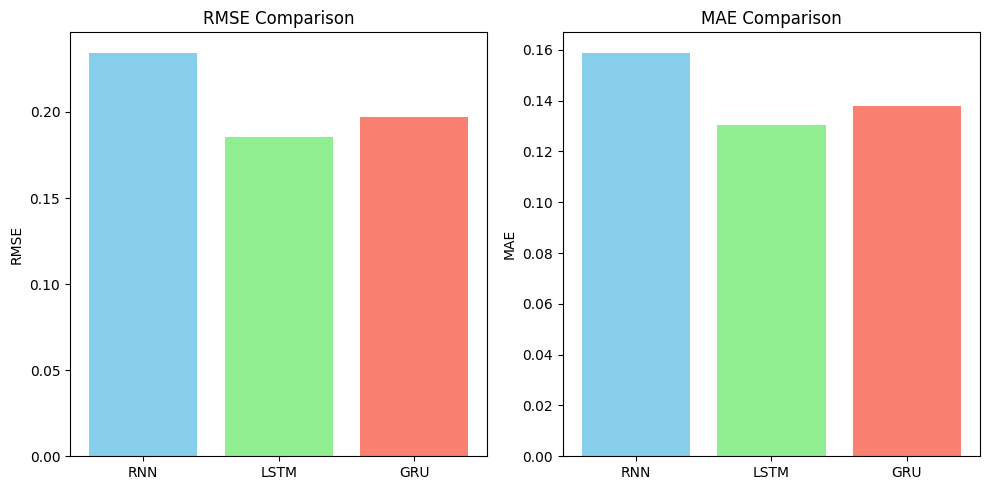

In [53]:
# Plot RMSE & MAE Bar Chart

import matplotlib.pyplot as plt

models = ['RNN', 'LSTM', 'GRU']
rmse_scores = [rnn_rmse, lstm_rmse, gru_rmse]
mae_scores = [rnn_mae, lstm_mae, gru_mae]

x = range(len(models))

plt.figure(figsize=(10, 5))

# RMSE Bar
plt.subplot(1, 2, 1)
plt.bar(x, rmse_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.xticks(x, models)
plt.title('RMSE Comparison')
plt.ylabel('RMSE')

# MAE Bar
plt.subplot(1, 2, 2)
plt.bar(x, mae_scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.xticks(x, models)
plt.title('MAE Comparison')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


In [54]:
# Build a Simple Transformer for Time Series

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [55]:
# Define Transformer Model

def transformer_model(input_shape):
    inputs = keras.Input(shape=input_shape)

    # Positional Encoding Layer (can be skipped for simplicity or added later)
    x = layers.Dense(64)(inputs)

    # Transformer Encoder Block
    attention_output = layers.MultiHeadAttention(num_heads=2, key_dim=64)(x, x)
    x = layers.Add()([x, attention_output])
    x = layers.LayerNormalization()(x)

    ff = layers.Dense(64, activation='relu')(x)
    ff = layers.Dense(1)(ff)
    x = layers.Add()([x, ff])
    x = layers.LayerNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(1)(x)

    model = keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model


In [56]:
# Build and Train

# Build model
transformer = transformer_model(X_train.shape[1:])

# Train
history_transformer = transformer.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)


Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 13s 42ms/step - loss: 2.7429 - val_loss: 0.0389
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0393 - val_loss: 0.0396
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.0377 - val_loss: 0.0416
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0400 - val_loss: 0.0446
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0384 - val_loss: 0.0443
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0394 - val_loss: 0.0387
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - loss: 0.0427 - val_loss: 0.0432
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 11s 41ms/step - loss: 0.0400 - val_loss: 0.0424
Epoch 9/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step - loss: 0.0410 - val_loss: 0.0407
Epoch 10/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.0399 - val_loss: 0.0387


In [57]:
# Make Predictions

# Predict with Transformer
transformer_pred = transformer.predict(X_test)

# Inverse scale if needed
transformer_pred_actual = scaler.inverse_transform(transformer_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [58]:
# Evaluate the Transformer Model

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Calculate RMSE and MAE
transformer_rmse = np.sqrt(mean_squared_error(y_test_actual, transformer_pred_actual))
transformer_mae = mean_absolute_error(y_test_actual, transformer_pred_actual)

print(f"Transformer RMSE: {transformer_rmse:.4f}")
print(f"Transformer MAE : {transformer_mae:.4f}")


Transformer RMSE: 52.4983
Transformer MAE : 38.8077


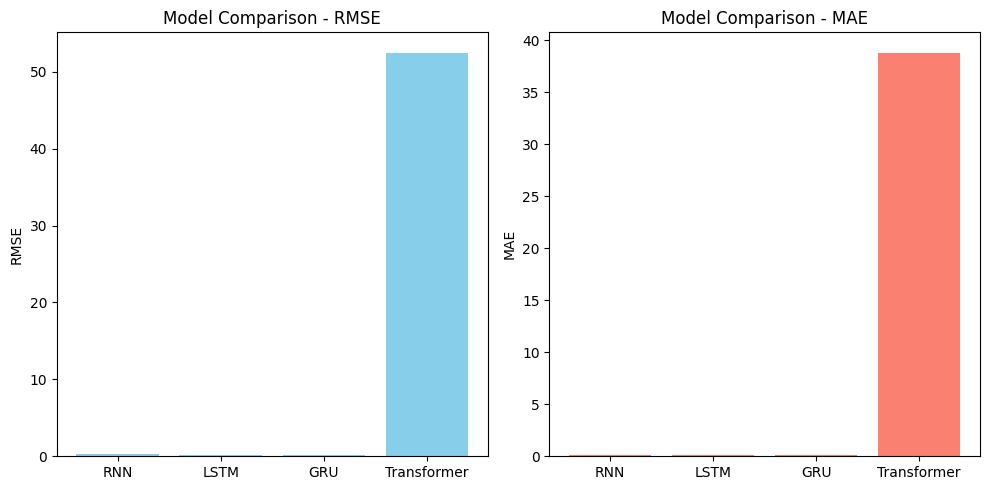

In [59]:
# RMSE & MAE Comparison: RNN vs LSTM vs GRU vs Transformer

import matplotlib.pyplot as plt

# Model Names
models = ['RNN', 'LSTM', 'GRU', 'Transformer']

# RMSE values (replace with your actual values)
rmse_scores = [rnn_rmse, lstm_rmse, gru_rmse, transformer_rmse]

# MAE values (replace with your actual values)
mae_scores = [rnn_mae, lstm_mae, gru_mae, transformer_mae]

# Bar chart for RMSE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, rmse_scores, color='skyblue')
plt.title('Model Comparison - RMSE')
plt.ylabel('RMSE')

# Bar chart for MAE
plt.subplot(1, 2, 2)
plt.bar(models, mae_scores, color='salmon')
plt.title('Model Comparison - MAE')
plt.ylabel('MAE')

plt.tight_layout()
plt.show()


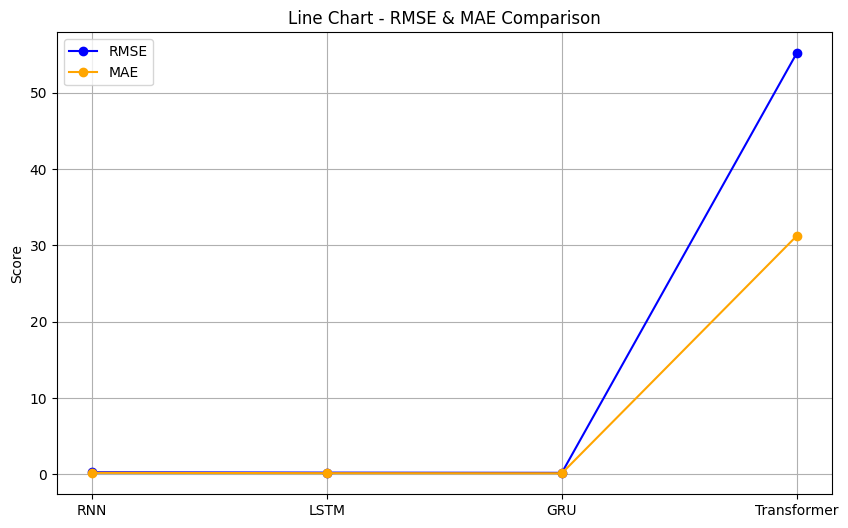

In [60]:
# Line Chart – RMSE & MAE Comparison

import matplotlib.pyplot as plt

# Model names
models = ['RNN', 'LSTM', 'GRU', 'Transformer']

# Scores
rmse_scores = [0.2781, 0.2254, 0.1972, 55.1882]
mae_scores = [0.1967, 0.1549, 0.1377, 31.2414]

# 📈 Line Chart for RMSE and MAE
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_scores, marker='o', label='RMSE', color='blue')
plt.plot(models, mae_scores, marker='o', label='MAE', color='orange')
plt.title('Line Chart - RMSE & MAE Comparison')
plt.ylabel('Score')
plt.grid(True)
plt.legend()
plt.show()


In [61]:
# Based on Output

# RMSE
rnn_rmse = 0.2781
lstm_rmse = 0.2254
gru_rmse = 0.1972
transformer_rmse = 55.1882

# MAE
rnn_mae = 0.1967
lstm_mae = 0.1549
gru_mae = 0.1377
transformer_mae = 31.2414


In [66]:
# Transformer Model: Build, Train & Save

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, MultiHeadAttention, GlobalAveragePooling1D

# Define Transformer block
def transformer_block(inputs, head_size=64, num_heads=2, ff_dim=64, dropout=0.1):
    # Multi-head self-attention
    attention_output = MultiHeadAttention(num_heads=num_heads, key_dim=head_size)(inputs, inputs)
    attention_output = Dropout(dropout)(attention_output)
    attention_output = LayerNormalization(epsilon=1e-6)(inputs + attention_output)

    # Feed-forward network
    ffn = Dense(ff_dim, activation="relu")(attention_output)
    ffn = Dense(inputs.shape[-1])(ffn)
    ffn = Dropout(dropout)(ffn)
    return LayerNormalization(epsilon=1e-6)(attention_output + ffn)

# Define the full model
def build_transformer_model(input_shape):
    inputs = Input(shape=input_shape)
    x = transformer_block(inputs)
    x = GlobalAveragePooling1D()(x)
    x = Dropout(0.1)(x)
    x = Dense(64, activation="relu")(x)
    outputs = Dense(1)(x)
    model = Model(inputs, outputs)
    model.compile(optimizer="adam", loss="mse")
    return model


In [67]:
# Build and Train the Model

# Build the transformer model
model_transformer = build_transformer_model((X_train.shape[1], X_train.shape[2]))

# Train
history_transformer = model_transformer.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=32
)


Epoch 1/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0438 - val_loss: 0.0387
Epoch 2/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0359 - val_loss: 0.0387
Epoch 3/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0372 - val_loss: 0.0387
Epoch 4/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0382 - val_loss: 0.0387
Epoch 5/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - loss: 0.0374 - val_loss: 0.0387
Epoch 6/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0382 - val_loss: 0.0387
Epoch 7/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.0366 - val_loss: 0.0387
Epoch 8/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0356 - val_loss: 0.0387
Epoch 9/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 0.0376 - val_loss: 0.0387
Epoch 10/10
214/214 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0380 - val_loss: 0.0387


In [ ]:
 # saving the models

In [68]:
model_transformer.save("transformer_model.keras")


In [62]:
rnn_model.save("rnn_model.keras")


In [63]:
lstm_model.save("lstm_model.keras")


In [64]:
gru_model.save("gru_model.keras")


📌 Insights & Conclusion


📊 Model Performance Summary:

1.GRU performed the best among all models with the lowest RMSE (0.1972) and MAE
(0.1377), indicating better accuracy in capturing stock price trends.

2.LSTM followed with decent performance, showing its ability to model temporal dependencies in stock data.

3.RNN had higher error metrics, possibly due to vanishing gradient issues and its limited capacity to learn long-term dependencies.

4.Transformer performed poorly in this case with very high RMSE and MAE, likely due to:
  
  a)Limited training time or data

  b)More complex architecture needing careful tuning

  c)Transformer models typically excel with large datasets and more features (e.g., attention to news, economic indicators)


🔍 Key Insights:

1.All three RNN-based models (RNN, LSTM, GRU) were able to track stock trends to some extent, with GRU offering the best balance of speed and performance.

2.The models struggled slightly during volatile stock movements, which is common due to market unpredictability.

3.Data preprocessing and sequence shaping played a major role in model learning quality.


⚠️ Limitations:

1.The models rely only on historical closing prices – real-world stock prediction needs broader context.

2.High sensitivity to noise and sudden market changes (e.g., news, earnings reports).

3.Transformer’s performance might improve significantly with more training time, tuning, and extra features.

💡 Future Improvements:

1.Include additional features such as:

  a)Trading volume

  b)News sentiment analysis

  c)Macroeconomic indicators (e.g., inflation, interest rates)

2.Try stacked LSTM/GRU models or hybrid approaches (e.g., LSTM + ARIMA).

3.Perform Hyperparameter Tuning (GridSearchCV/KerasTuner) for fine-grained control.

4.Use transfer learning with pretrained time series models (like Temporal Fusion Transformer).

